In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


In [2]:
import pandas as pd

df = pd.read_csv(
    "/kaggle/input/sms-spam-collection-dataset/spam.csv",
    encoding="latin-1"
)
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
df.columns



Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:


df = df.rename(columns={
    "v1": "label",
    "v2": "message"
})

df = df[["label", "message"]]

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df["label"].value_counts()
df["message"].head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.dropna(inplace=True)


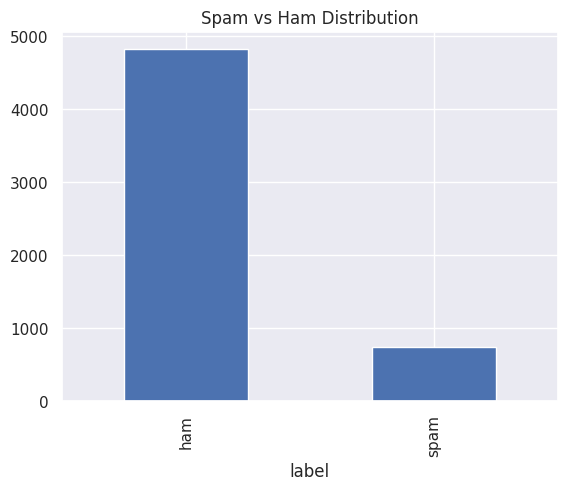

In [8]:
df["label"].value_counts().plot(kind="bar", title="Spam vs Ham Distribution")
plt.show()


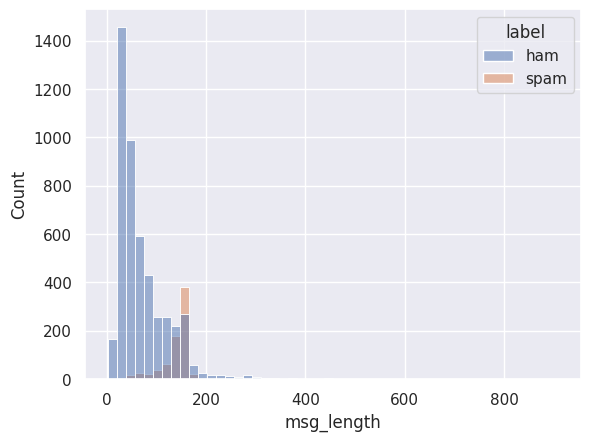

In [9]:
df["msg_length"] = df["message"].apply(len)
df.head()
df.groupby("label")["msg_length"].mean()
sns.histplot(data=df, x="msg_length", hue="label", bins=50)
plt.show()


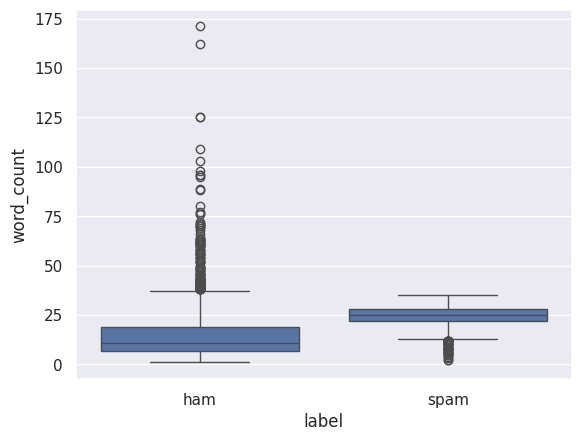

[('to', 682),
 ('a', 373),
 ('call', 342),
 ('your', 263),
 ('you', 252),
 ('the', 204),
 ('for', 201),
 ('or', 188),
 ('free', 180),
 ('2', 169),
 ('is', 152),
 ('ur', 144),
 ('on', 141),
 ('txt', 136),
 ('have', 135),
 ('from', 127),
 ('and', 122),
 ('u', 117),
 ('text', 112),
 ('mobile', 109)]

In [10]:
df["word_count"] = df["message"].apply(lambda x: len(x.split()))
df.groupby("label")["word_count"].mean()
sns.boxplot(x="label", y="word_count", data=df)
plt.show()
from collections import Counter

spam_words = " ".join(df[df["label"] == "spam"]["message"]).lower().split()
ham_words = " ".join(df[df["label"] == "ham"]["message"]).lower().split()

Counter(spam_words).most_common(20)


In [11]:
from collections import Counter

spam_words = " ".join(df[df["label"] == "spam"]["message"]).lower().split()
ham_words = " ".join(df[df["label"] == "ham"]["message"]).lower().split()

Counter(spam_words).most_common(20)
Counter(ham_words).most_common(20)


[('i', 2172),
 ('you', 1665),
 ('to', 1544),
 ('the', 1113),
 ('a', 1046),
 ('u', 874),
 ('and', 845),
 ('in', 786),
 ('my', 741),
 ('is', 710),
 ('me', 584),
 ('of', 518),
 ('for', 496),
 ('that', 442),
 ('it', 440),
 ('have', 433),
 ('your', 413),
 ('but', 413),
 ('are', 405),
 ('so', 399)]

In [12]:
Counter(ham_words).most_common(20)


[('i', 2172),
 ('you', 1665),
 ('to', 1544),
 ('the', 1113),
 ('a', 1046),
 ('u', 874),
 ('and', 845),
 ('in', 786),
 ('my', 741),
 ('is', 710),
 ('me', 584),
 ('of', 518),
 ('for', 496),
 ('that', 442),
 ('it', 440),
 ('have', 433),
 ('your', 413),
 ('but', 413),
 ('are', 405),
 ('so', 399)]